In [1]:
from mave_calibration.initialization.kmeans_init import kmeans_init
from mave_calibration.skew_normal.density_utils import mixture_pdf
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
true_params = [
    [1.5, -5, 2],
    [-2, 4, 2]
]

true_weights = [.25, .75]

n_samples = 1000

In [3]:
X = np.concatenate([sps.skewnorm.rvs(a, loc, scale, size=int(round(n_samples * w))) for (a, loc, scale),w in zip(true_params, true_weights)])

<Axes: ylabel='Count'>

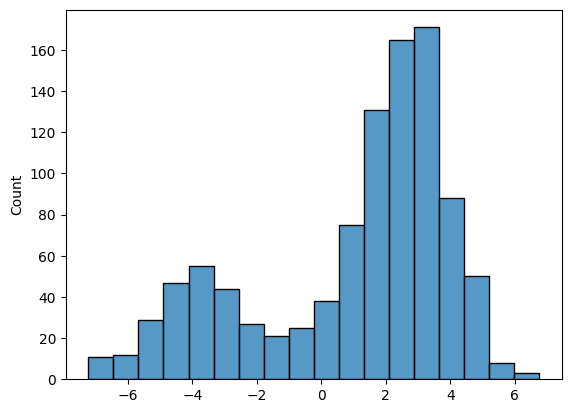

In [4]:
sns.histplot(X)

In [5]:
component_params, component_weights = kmeans_init(X, n_clusters=2)

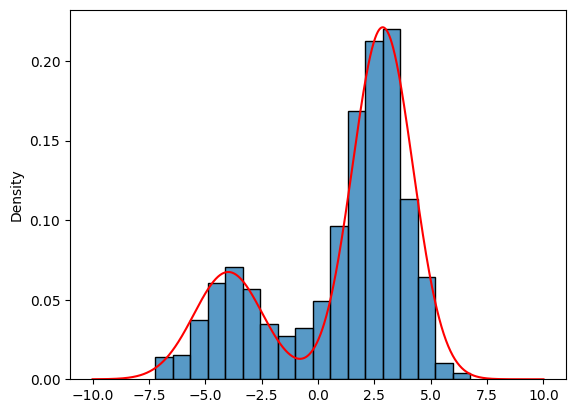

In [6]:
sns.histplot(X,stat='density')
x = np.linspace(-10, 10, 1000)
plt.plot(x, mixture_pdf(x, component_params, component_weights), color='red')